100


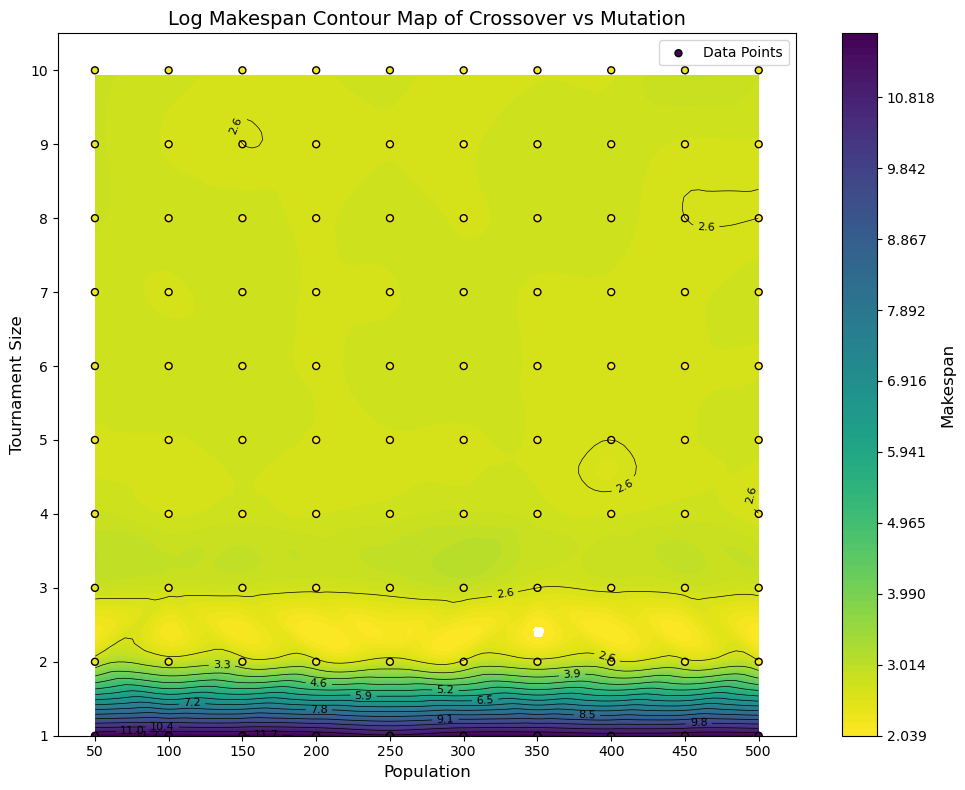

In [ ]:
# %%

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

data = pd.read_csv(
    'C:/Users/User/Desktop/Python/ai_assignment/population_tournament/population_tournament_medium.txt'
)

POPULATION_SIZE = data['POPULATION_SIZE']
TOURNAMENT_SIZE = data['TOURNAMENT_SIZE']
makespan = data['MAKESPAN']

makespan = np.array([math.log(ms) for ms in makespan]) # log makespan

# ### normal makespan with dropped values
# removed = []
# for i, ms in enumerate(makespan):
#     if (ms > 10000):
#         removed.append(i)

# for i in removed:
#     POPULATION_SIZE[i] = np.NaN
#     TOURNAMENT_SIZE[i] = np.NaN
#     makespan[i] = np.NAN

#     # makespan[i] = 48

# POPULATION_SIZE = POPULATION_SIZE.dropna()
# TOURNAMENT_SIZE = TOURNAMENT_SIZE.dropna()
# makespan = makespan.dropna()

###

print(makespan.shape[0])


# Create a grid for interpolation
x = np.linspace(25, 525, makespan.shape[0])
y = np.linspace(1, 10.5, makespan.shape[0])
X, Y = np.meshgrid(x, y)

Z = griddata((POPULATION_SIZE, TOURNAMENT_SIZE),
             makespan, (X, Y),
             method='cubic')

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

contour_filled = plt.contourf(X,
                              Y,
                              Z,
                              levels=np.linspace(makespan.min() - 0.6,
                                                 makespan.max(),
                                                 makespan.shape[0]),
                              cmap='viridis_r')

contour_lines = plt.contour(X,
                            Y,
                            Z,
                            levels=np.linspace(makespan.min(), makespan.max(),
                                               15),
                            colors='black',
                            linewidths=0.5)

plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
# defining custom minor tick locations:
ax.xaxis.set_major_locator(
    plt.FixedLocator([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
ax.yaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

cbar = plt.colorbar(contour_filled)
cbar.set_label('Makespan', fontsize=12)

plt.scatter(POPULATION_SIZE,
            TOURNAMENT_SIZE,
            c=makespan,
            cmap='viridis_r',
            edgecolor='k',
            s=25,
            label='Data Points')

plt.xlabel('Population', fontsize=12)
plt.ylabel('Tournament Size', fontsize=12)
plt.title('Log Makespan Contour Map of Crossover vs Mutation', fontsize=14) # log makespan title
# plt.title('Makespan Contour Map of Population vs Tournament Size',
#           fontsize=14)  # normal makespan title
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

90


<ipython-input-2-d282019a85a5>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POPULATION_SIZE[i] = np.NaN
<ipython-input-2-d282019a85a5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOURNAMENT_SIZE[i] = np.NaN
<ipython-input-2-d282019a85a5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makespan[i] = np.NAN


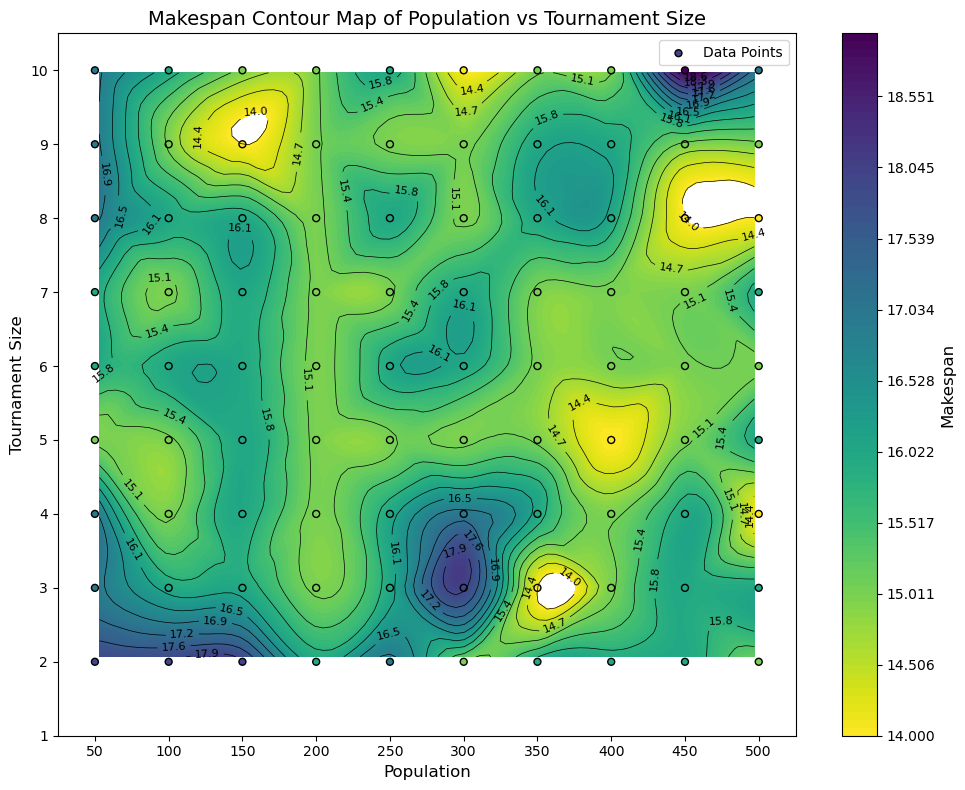

In [ ]:
# %%

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

data = pd.read_csv(
    'C:/Users/User/Desktop/Python/ai_assignment/population_tournament/population_tournament_medium.txt'
)

POPULATION_SIZE = data['POPULATION_SIZE']
TOURNAMENT_SIZE = data['TOURNAMENT_SIZE']
makespan = data['MAKESPAN']

# makespan = np.array([math.log(ms) for ms in makespan]) # log makespan

### normal makespan with dropped values
removed = []
for i, ms in enumerate(makespan):
    if (ms > 10000):
        removed.append(i)

for i in removed:
    POPULATION_SIZE[i] = np.NaN
    TOURNAMENT_SIZE[i] = np.NaN
    makespan[i] = np.NAN

    # makespan[i] = 48

POPULATION_SIZE = POPULATION_SIZE.dropna()
TOURNAMENT_SIZE = TOURNAMENT_SIZE.dropna()
makespan = makespan.dropna()

###

print(makespan.shape[0])


# Create a grid for interpolation
x = np.linspace(25, 525, makespan.shape[0])
y = np.linspace(1, 10.5, makespan.shape[0])
X, Y = np.meshgrid(x, y)

Z = griddata((POPULATION_SIZE, TOURNAMENT_SIZE),
             makespan, (X, Y),
             method='cubic')

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

# contour_filled = plt.contourf(X,
#                               Y,
#                               Z,
#                               levels=np.linspace(makespan.min() - 0.6,
#                                                  makespan.max(),
#                                                  makespan.shape[0]),
#                               cmap='viridis_r')
contour_filled = plt.contourf(X,
                              Y,
                              Z,
                              levels=np.linspace(makespan.min(),
                                                 makespan.max(),
                                                 makespan.shape[0]),
                              cmap='viridis_r')

contour_lines = plt.contour(X,
                            Y,
                            Z,
                            levels=np.linspace(makespan.min(), makespan.max(),
                                               15),
                            colors='black',
                            linewidths=0.5)

plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
# defining custom minor tick locations:
ax.xaxis.set_major_locator(
    plt.FixedLocator([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
ax.yaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

cbar = plt.colorbar(contour_filled)
cbar.set_label('Makespan', fontsize=12)

plt.scatter(POPULATION_SIZE,
            TOURNAMENT_SIZE,
            c=makespan,
            cmap='viridis_r',
            edgecolor='k',
            s=25,
            label='Data Points')

plt.xlabel('Population', fontsize=12)
plt.ylabel('Tournament Size', fontsize=12)
# plt.title('Log Makespan Contour Map of Crossover vs Mutation', fontsize=14) # log makespan title
plt.title('Makespan Contour Map of Population vs Tournament Size',
          fontsize=14)  # normal makespan title
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

<ipython-input-3-eb703cc4d3df>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POPULATION_SIZE[i] = np.NaN
<ipython-input-3-eb703cc4d3df>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOURNAMENT_SIZE[i] = np.NaN
<ipython-input-3-eb703cc4d3df>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makespan[i] = np.NAN


90


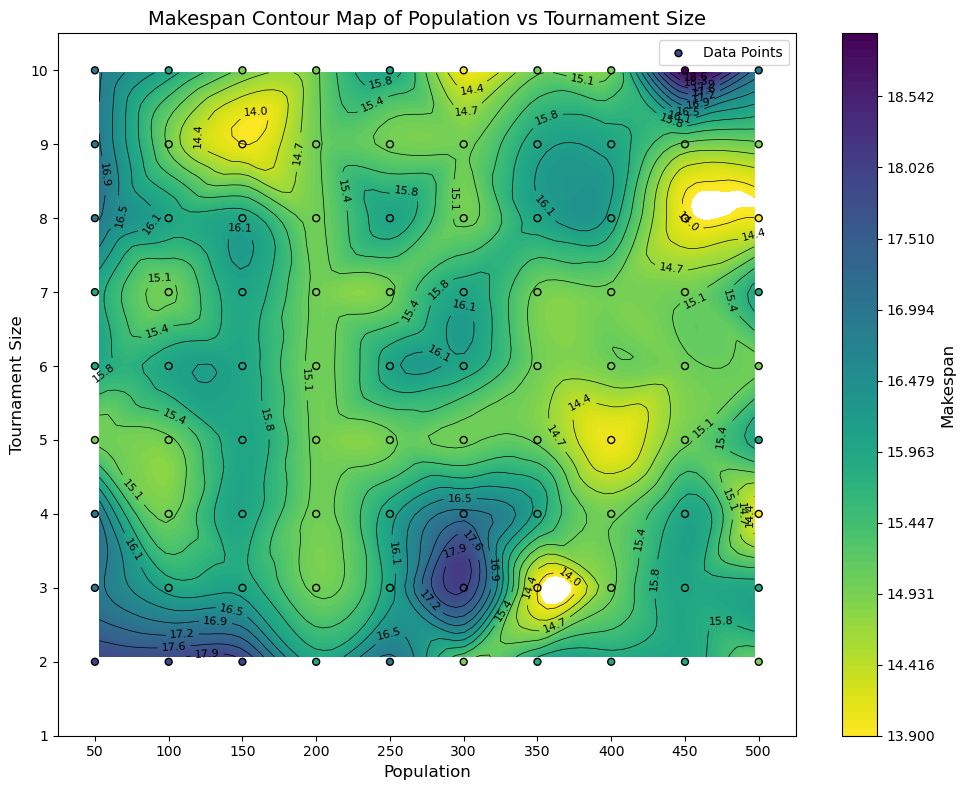

In [ ]:
# %%

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

data = pd.read_csv(
    'C:/Users/User/Desktop/Python/ai_assignment/population_tournament/population_tournament_medium.txt'
)

POPULATION_SIZE = data['POPULATION_SIZE']
TOURNAMENT_SIZE = data['TOURNAMENT_SIZE']
makespan = data['MAKESPAN']

# makespan = np.array([math.log(ms) for ms in makespan]) # log makespan

### normal makespan with dropped values
removed = []
for i, ms in enumerate(makespan):
    if (ms > 10000):
        removed.append(i)

for i in removed:
    POPULATION_SIZE[i] = np.NaN
    TOURNAMENT_SIZE[i] = np.NaN
    makespan[i] = np.NAN

    # makespan[i] = 48

POPULATION_SIZE = POPULATION_SIZE.dropna()
TOURNAMENT_SIZE = TOURNAMENT_SIZE.dropna()
makespan = makespan.dropna()

###

print(makespan.shape[0])


# Create a grid for interpolation
x = np.linspace(25, 525, makespan.shape[0])
y = np.linspace(1, 10.5, makespan.shape[0])
X, Y = np.meshgrid(x, y)

Z = griddata((POPULATION_SIZE, TOURNAMENT_SIZE),
             makespan, (X, Y),
             method='cubic')

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

# contour_filled = plt.contourf(X,
#                               Y,
#                               Z,
#                               levels=np.linspace(makespan.min() - 0.6,
#                                                  makespan.max(),
#                                                  makespan.shape[0]),
#                               cmap='viridis_r')
contour_filled = plt.contourf(X,
                              Y,
                              Z,
                              levels=np.linspace(makespan.min() - 0.1,
                                                 makespan.max(),
                                                 makespan.shape[0]),
                              cmap='viridis_r')

contour_lines = plt.contour(X,
                            Y,
                            Z,
                            levels=np.linspace(makespan.min(), makespan.max(),
                                               15),
                            colors='black',
                            linewidths=0.5)

plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
# defining custom minor tick locations:
ax.xaxis.set_major_locator(
    plt.FixedLocator([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
ax.yaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

cbar = plt.colorbar(contour_filled)
cbar.set_label('Makespan', fontsize=12)

plt.scatter(POPULATION_SIZE,
            TOURNAMENT_SIZE,
            c=makespan,
            cmap='viridis_r',
            edgecolor='k',
            s=25,
            label='Data Points')

plt.xlabel('Population', fontsize=12)
plt.ylabel('Tournament Size', fontsize=12)
# plt.title('Log Makespan Contour Map of Crossover vs Mutation', fontsize=14) # log makespan title
plt.title('Makespan Contour Map of Population vs Tournament Size',
          fontsize=14)  # normal makespan title
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

<ipython-input-4-d282019a85a5>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POPULATION_SIZE[i] = np.NaN
<ipython-input-4-d282019a85a5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOURNAMENT_SIZE[i] = np.NaN
<ipython-input-4-d282019a85a5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makespan[i] = np.NAN


90


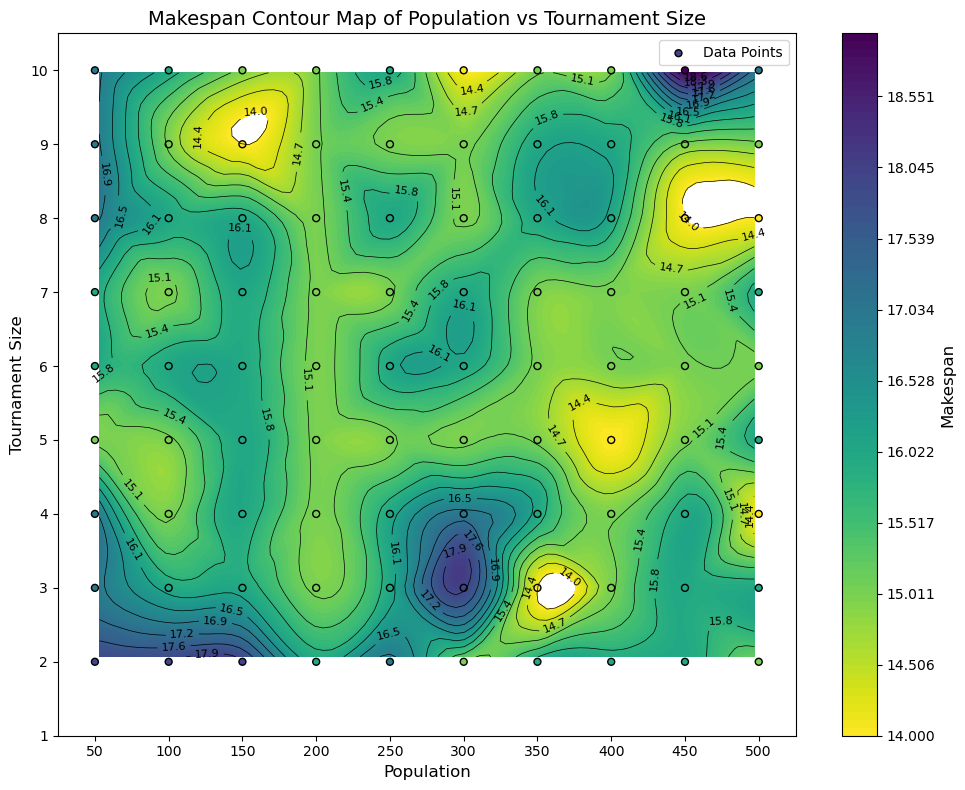

In [ ]:
# %%

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

data = pd.read_csv(
    'C:/Users/User/Desktop/Python/ai_assignment/population_tournament/population_tournament_medium.txt'
)

POPULATION_SIZE = data['POPULATION_SIZE']
TOURNAMENT_SIZE = data['TOURNAMENT_SIZE']
makespan = data['MAKESPAN']

# makespan = np.array([math.log(ms) for ms in makespan]) # log makespan

### normal makespan with dropped values
removed = []
for i, ms in enumerate(makespan):
    if (ms > 10000):
        removed.append(i)

for i in removed:
    POPULATION_SIZE[i] = np.NaN
    TOURNAMENT_SIZE[i] = np.NaN
    makespan[i] = np.NAN

    # makespan[i] = 48

POPULATION_SIZE = POPULATION_SIZE.dropna()
TOURNAMENT_SIZE = TOURNAMENT_SIZE.dropna()
makespan = makespan.dropna()

###

print(makespan.shape[0])


# Create a grid for interpolation
x = np.linspace(25, 525, makespan.shape[0])
y = np.linspace(1, 10.5, makespan.shape[0])
X, Y = np.meshgrid(x, y)

Z = griddata((POPULATION_SIZE, TOURNAMENT_SIZE),
             makespan, (X, Y),
             method='cubic')

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

# contour_filled = plt.contourf(X,
#                               Y,
#                               Z,
#                               levels=np.linspace(makespan.min() - 0.6,
#                                                  makespan.max(),
#                                                  makespan.shape[0]),
#                               cmap='viridis_r')
contour_filled = plt.contourf(X,
                              Y,
                              Z,
                              levels=np.linspace(makespan.min(),
                                                 makespan.max(),
                                                 makespan.shape[0]),
                              cmap='viridis_r')

contour_lines = plt.contour(X,
                            Y,
                            Z,
                            levels=np.linspace(makespan.min(), makespan.max(),
                                               15),
                            colors='black',
                            linewidths=0.5)

plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
# defining custom minor tick locations:
ax.xaxis.set_major_locator(
    plt.FixedLocator([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
ax.yaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

cbar = plt.colorbar(contour_filled)
cbar.set_label('Makespan', fontsize=12)

plt.scatter(POPULATION_SIZE,
            TOURNAMENT_SIZE,
            c=makespan,
            cmap='viridis_r',
            edgecolor='k',
            s=25,
            label='Data Points')

plt.xlabel('Population', fontsize=12)
plt.ylabel('Tournament Size', fontsize=12)
# plt.title('Log Makespan Contour Map of Crossover vs Mutation', fontsize=14) # log makespan title
plt.title('Makespan Contour Map of Population vs Tournament Size',
          fontsize=14)  # normal makespan title
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

100


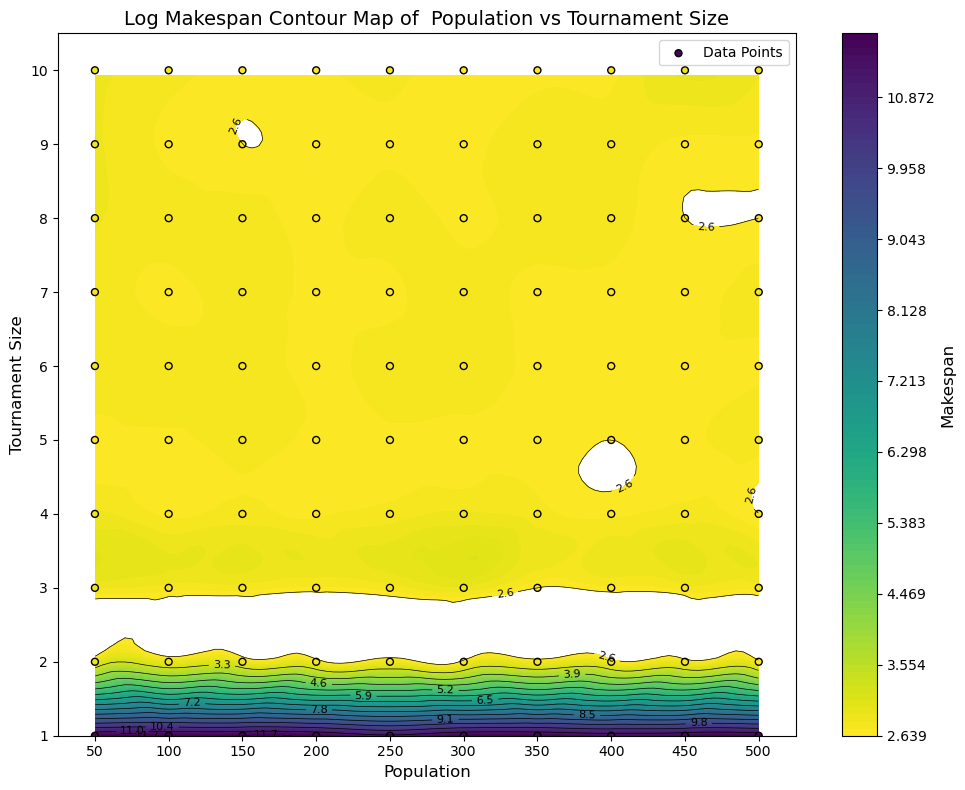

In [ ]:
# %%

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

data = pd.read_csv(
    'C:/Users/User/Desktop/Python/ai_assignment/population_tournament/population_tournament_medium.txt'
)

POPULATION_SIZE = data['POPULATION_SIZE']
TOURNAMENT_SIZE = data['TOURNAMENT_SIZE']
makespan = data['MAKESPAN']

makespan = np.array([math.log(ms) for ms in makespan]) # log makespan

# ### normal makespan with dropped values
# removed = []
# for i, ms in enumerate(makespan):
#     if (ms > 10000):
#         removed.append(i)

# for i in removed:
#     POPULATION_SIZE[i] = np.NaN
#     TOURNAMENT_SIZE[i] = np.NaN
#     makespan[i] = np.NAN

#     # makespan[i] = 48

# POPULATION_SIZE = POPULATION_SIZE.dropna()
# TOURNAMENT_SIZE = TOURNAMENT_SIZE.dropna()
# makespan = makespan.dropna()

###

print(makespan.shape[0])


# Create a grid for interpolation
x = np.linspace(25, 525, makespan.shape[0])
y = np.linspace(1, 10.5, makespan.shape[0])
X, Y = np.meshgrid(x, y)

Z = griddata((POPULATION_SIZE, TOURNAMENT_SIZE),
             makespan, (X, Y),
             method='cubic')

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

# contour_filled = plt.contourf(X,
#                               Y,
#                               Z,
#                               levels=np.linspace(makespan.min() - 0.6,
#                                                  makespan.max(),
#                                                  makespan.shape[0]),
#                               cmap='viridis_r')
contour_filled = plt.contourf(X,
                              Y,
                              Z,
                              levels=np.linspace(makespan.min(),
                                                 makespan.max(),
                                                 makespan.shape[0]),
                              cmap='viridis_r')

contour_lines = plt.contour(X,
                            Y,
                            Z,
                            levels=np.linspace(makespan.min(), makespan.max(),
                                               15),
                            colors='black',
                            linewidths=0.5)

plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
# defining custom minor tick locations:
ax.xaxis.set_major_locator(
    plt.FixedLocator([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
ax.yaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

cbar = plt.colorbar(contour_filled)
cbar.set_label('Makespan', fontsize=12)

plt.scatter(POPULATION_SIZE,
            TOURNAMENT_SIZE,
            c=makespan,
            cmap='viridis_r',
            edgecolor='k',
            s=25,
            label='Data Points')

plt.xlabel('Population', fontsize=12)
plt.ylabel('Tournament Size', fontsize=12)
plt.title('Log Makespan Contour Map of  Population vs Tournament Size', fontsize=14) # log makespan title
# plt.title('Makespan Contour Map of Population vs Tournament Size',
#           fontsize=14)  # normal makespan title
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

100


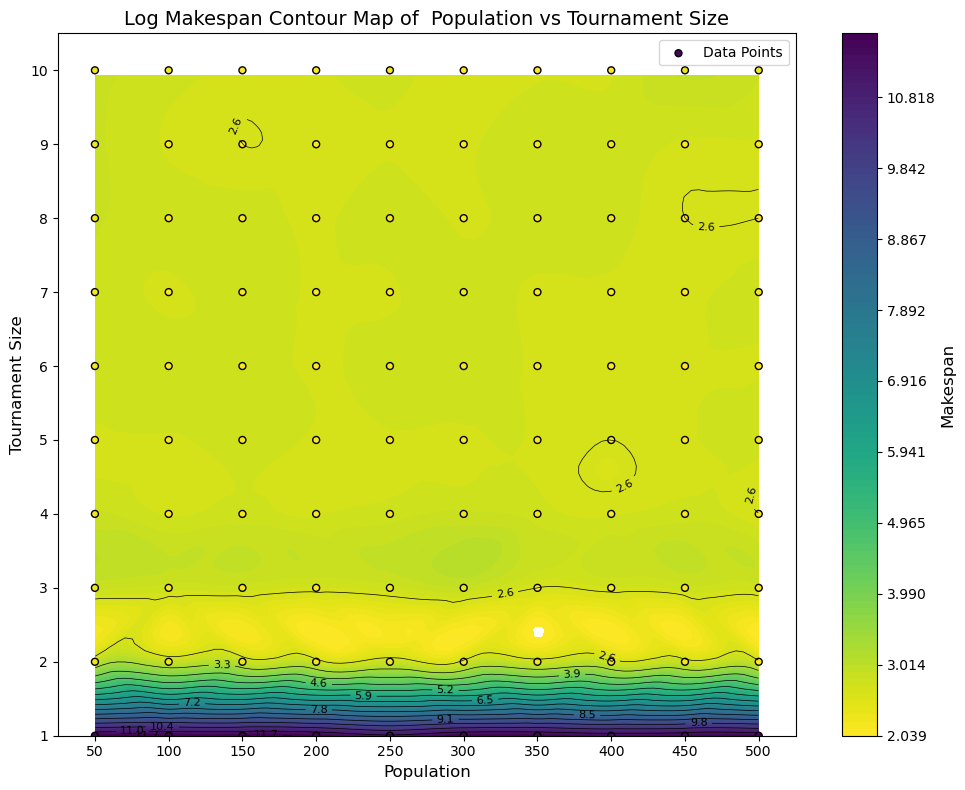

In [ ]:
# %%

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

data = pd.read_csv(
    'C:/Users/User/Desktop/Python/ai_assignment/population_tournament/population_tournament_medium.txt'
)

POPULATION_SIZE = data['POPULATION_SIZE']
TOURNAMENT_SIZE = data['TOURNAMENT_SIZE']
makespan = data['MAKESPAN']

makespan = np.array([math.log(ms) for ms in makespan]) # log makespan

# ### normal makespan with dropped values
# removed = []
# for i, ms in enumerate(makespan):
#     if (ms > 10000):
#         removed.append(i)

# for i in removed:
#     POPULATION_SIZE[i] = np.NaN
#     TOURNAMENT_SIZE[i] = np.NaN
#     makespan[i] = np.NAN

#     # makespan[i] = 48

# POPULATION_SIZE = POPULATION_SIZE.dropna()
# TOURNAMENT_SIZE = TOURNAMENT_SIZE.dropna()
# makespan = makespan.dropna()

###

print(makespan.shape[0])


# Create a grid for interpolation
x = np.linspace(25, 525, makespan.shape[0])
y = np.linspace(1, 10.5, makespan.shape[0])
X, Y = np.meshgrid(x, y)

Z = griddata((POPULATION_SIZE, TOURNAMENT_SIZE),
             makespan, (X, Y),
             method='cubic')

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

contour_filled = plt.contourf(X,
                              Y,
                              Z,
                              levels=np.linspace(makespan.min() - 0.6,
                                                 makespan.max(),
                                                 makespan.shape[0]),
                              cmap='viridis_r')

# contour_filled = plt.contourf(X,
#                               Y,
#                               Z,
#                               levels=np.linspace(makespan.min(),
#                                                  makespan.max(),
#                                                  makespan.shape[0]),
#                               cmap='viridis_r')

contour_lines = plt.contour(X,
                            Y,
                            Z,
                            levels=np.linspace(makespan.min(), makespan.max(),
                                               15),
                            colors='black',
                            linewidths=0.5)

plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
# defining custom minor tick locations:
ax.xaxis.set_major_locator(
    plt.FixedLocator([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
ax.yaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

cbar = plt.colorbar(contour_filled)
cbar.set_label('Makespan', fontsize=12)

plt.scatter(POPULATION_SIZE,
            TOURNAMENT_SIZE,
            c=makespan,
            cmap='viridis_r',
            edgecolor='k',
            s=25,
            label='Data Points')

plt.xlabel('Population', fontsize=12)
plt.ylabel('Tournament Size', fontsize=12)
plt.title('Log Makespan Contour Map of  Population vs Tournament Size', fontsize=14) # log makespan title
# plt.title('Makespan Contour Map of Population vs Tournament Size',
#           fontsize=14)  # normal makespan title
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()